<a href="https://colab.research.google.com/github/saharzare/API-Development/blob/main/data_preprocessing_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

##Import Libreries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import imblearn.over_sampling
import sklearn.metrics


##Business Understanding Problem
Regarding the features and target it's a classification algorithem that clasifies the target into two classes less or more than 50k.




##Data Collection

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
# to avoid data leakage we need to split dataset to train and test
df_train, df_test = sklearn.model_selection.train_test_split(df)
df.shape, df_train.shape, df_test.shape

((32561, 15), (24420, 15), (8141, 15))

##Data Exploration

In [ ]:
##type of each column
df_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

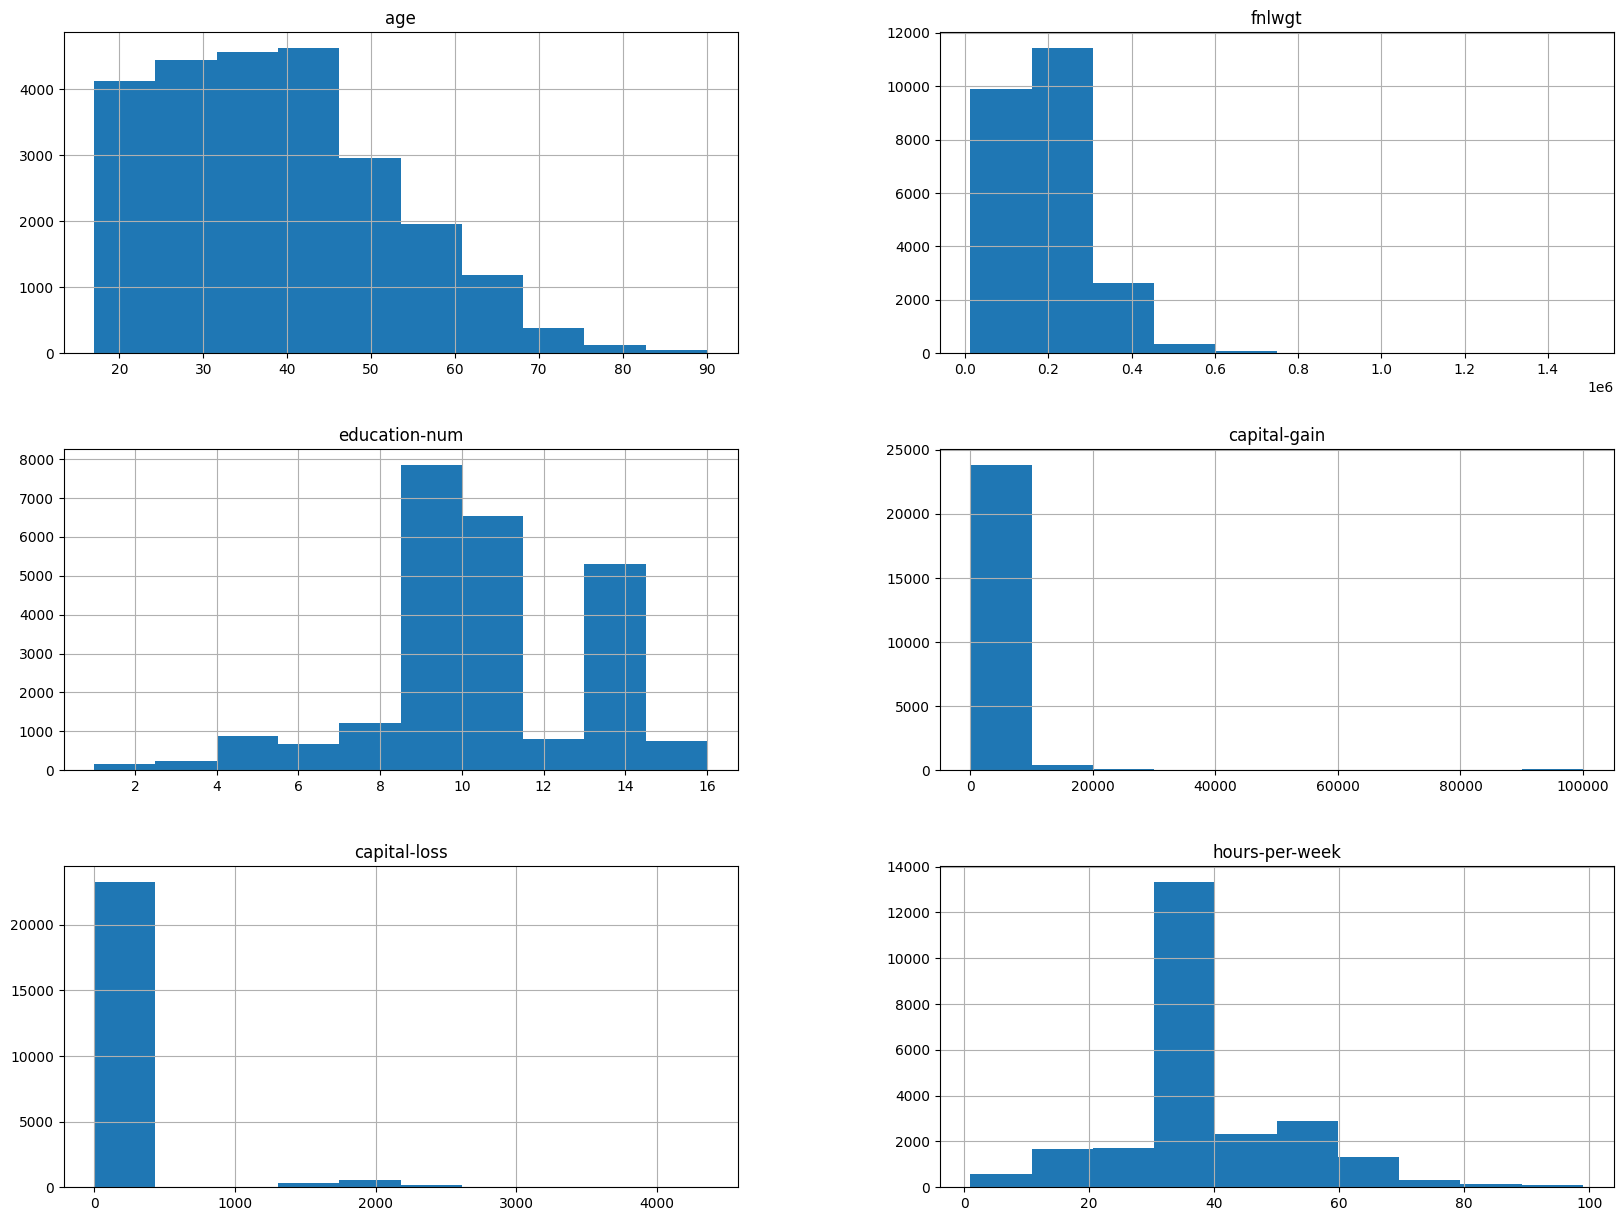

In [ ]:
##distribution of numerical data
df_train.hist(figsize=(20,15))


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [ ]:
for column in df.columns:
  if column.dtype == 'object':
    print(column)
    print(df[column].value_counts())

AttributeError: 'str' object has no attribute 'dtype'

<Axes: xlabel='workclass'>

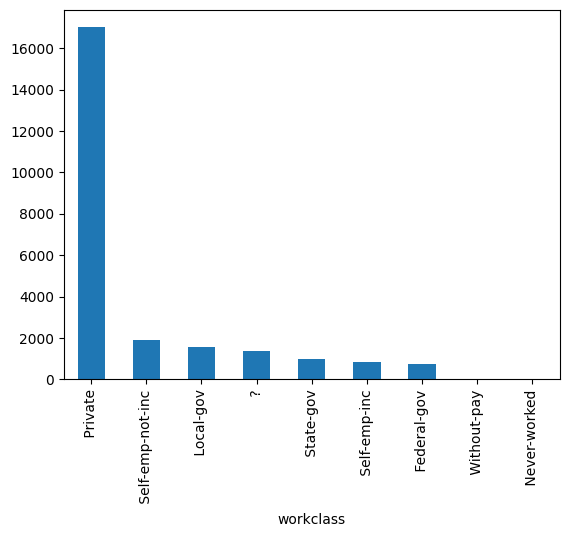

In [ ]:
df_train['workclass'].value_counts().plot(kind='bar')

from categorical feature we understand, implicit missing value we have(?)

In [ ]:
#we need to check the target class if there is any imbalaned data
(df_train['target'].value_counts(normalize=True)*100)

,proportion
target,
<=50K,75.982801
>50K,24.017199


##Data Preprocessing

In [ ]:
df_train.isna().sum()
df_test.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df_train['workclass'].unique()

array([' Private', ' Federal-gov', ' Self-emp-not-inc', ' Self-emp-inc',
       ' State-gov', ' Local-gov', ' ?', ' Without-pay', ' Never-worked'],
      dtype=object)

In [ ]:
(df_train == ' ?').sum()



,0
age,0
workclass,1388
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1394
relationship,0
race,0
sex,0


In [ ]:
#turning implict missing value to explicit
df_train = df_train.replace(' ?', np.nan)
df_test = df_test.replace(' ?', np.nan)
#remove explicit missing values
df_train = df_train.dropna()
df_test = df_test.dropna()
df.shape, df_train.shape, df_test.shape

((32561, 15), (22614, 15), (7548, 15))

In [ ]:
x_train = df_train.drop('target', axis=1)
y_train = df_train['target']
x_test = df_test.drop('target', axis=1)
y_test = df_test['target']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(22614, 14) (22614,) (7548, 14) (7548,)


##Feature Engineering

In [ ]:
categorical_features = df_train.select_dtypes(include=['object']).columns

##Modeling

In [ ]:
# train the model
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

##Evaluation Model

In [ ]:
#evaulating model
y_pred = model.predict(x_test)

In [ ]:
#metrics
accuracy=sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy

0.8496290408055114